In [2]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load modules related to this exercise
import NPL
from model_zucher import zurcher
from Solve_NFXP import solve_NFXP



# Problem set 5

#### 1. Look at the ReadMe.txt to get an overview of the code

#### 2.What is the difference between $EV(x,a)$ and $V_{\sigma}(x)$? 

#### 3. Write the formula for $P=\Lambda(V_{\sigma})$, $V_{\sigma}=\varphi(P)$ and $P=\Psi(P)$, exploiting the extreme value type I distribution on $\epsilon$. 
Hint: what is $e(a,P)\equiv E[\epsilon(a)|x,a]$ under this distributional assumption? 

Insert the found formulars under zucher.phi ($V_{\sigma}=\varphi(P)$) and zucher.lambdaa ( $P=\Lambda(V_{\sigma})$)

#### 4. Solve the model using NPL, and plot the convergence of psi to check that your results are correct

In [5]:
model = zurcher()
pk0 = np.ones((model.n))*0.99
model.psi(pk0)
model.Vsigma

array([2764.59476549, 2764.42079663, 2764.24732068, 2764.07434129,
       2763.90186211, 2763.72988685, 2763.55841922, 2763.38746297,
       2763.21702187, 2763.04709974, 2762.8777004 , 2762.70882771,
       2762.54048556, 2762.37267787, 2762.20540858, 2762.03868167,
       2761.87250114, 2761.70687103, 2761.5417954 , 2761.37727835,
       2761.21332399, 2761.04993649, 2760.88712002, 2760.72487881,
       2760.56321711, 2760.40213918, 2760.24164934, 2760.08175194,
       2759.92245134, 2759.76375195, 2759.60565822, 2759.44817461,
       2759.29130563, 2759.13505582, 2758.97942974, 2758.82443201,
       2758.67006726, 2758.51634016, 2758.36325543, 2758.2108178 ,
       2758.05903206, 2757.90790301, 2757.75743552, 2757.60763445,
       2757.45850473, 2757.31005131, 2757.1622792 , 2757.01519342,
       2756.86879904, 2756.72310116, 2756.57810492, 2756.43381551,
       2756.29023815, 2756.14737808, 2756.00524062, 2755.86383108,
       2755.72315486, 2755.58321735, 2755.44402402, 2755.30558

In [6]:
model.Finv

array([[  11.42916016,   54.9006633 ,   81.51069055, ...,   20.83531938,
          20.68261476, 2801.29408728],
       [  10.32692362,   55.46471134,   81.24983376, ...,   20.83682739,
          20.68411172, 2801.49683793],
       [  10.32692362,   54.3624748 ,   81.81388181, ...,   20.83834653,
          20.68561973, 2801.70108554],
       ...,
       [  10.32692362,   54.3624748 ,   80.71164526, ...,   21.73330832,
          21.01805261, 2871.21241907],
       [  10.32692362,   54.3624748 ,   80.71164526, ...,   20.63107177,
          21.58210065, 2871.75060758],
       [  10.32692362,   54.3624748 ,   80.71164526, ...,   20.63107177,
          20.47986411, 2872.85284412]])

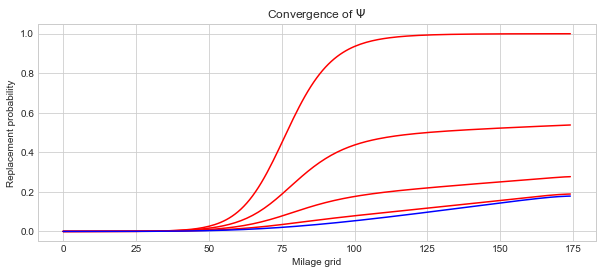

In [8]:
# SETUP
model = zurcher()

# SOLVE THE MODEL
pk_NPL = NPL.solve(model)

fig = plt.figure(figsize=(10,4)) 
ax = fig.add_subplot(1,1,1)

ax.set_title(f'Convergence of $\Psi$')
ax.set_xlabel('Milage grid')
ax.set_ylabel('Replacement probability')
for i in range(4):
    ax.plot(model.grid,1-pk_NPL[i+1,:],color = 'red')
ax.plot(model.grid,1-pk_NPL[99,:],color = 'blue')
plt.show()

In [9]:
1-pk_NPL[99,:]

array([8.08331835e-06, 9.55476543e-06, 1.12741082e-05, 1.32793312e-05,
       1.56135650e-05, 1.83256700e-05, 2.14708686e-05, 2.51114280e-05,
       2.93173925e-05, 3.41673677e-05, 3.97493554e-05, 4.61616380e-05,
       5.35137120e-05, 6.19272675e-05, 7.15372096e-05, 8.24927189e-05,
       9.49583444e-05, 1.09115123e-04, 1.25161716e-04, 1.43315558e-04,
       1.63814003e-04, 1.86915455e-04, 2.12900481e-04, 2.42072880e-04,
       2.74760696e-04, 3.11317167e-04, 3.52121585e-04, 3.97580047e-04,
       4.48126097e-04, 5.04221211e-04, 5.66355145e-04, 6.35046089e-04,
       7.10840646e-04, 7.94313594e-04, 8.86067438e-04, 9.86731719e-04,
       1.09696209e-03, 1.21743913e-03, 1.34886694e-03, 1.49197143e-03,
       1.64749839e-03, 1.81621132e-03, 1.99888900e-03, 2.19632281e-03,
       2.40931393e-03, 2.63867027e-03, 2.88520321e-03, 3.14972435e-03,
       3.43304192e-03, 3.73595736e-03, 4.05926163e-03, 4.40373166e-03,
       4.77012675e-03, 5.15918503e-03, 5.57162006e-03, 6.00811746e-03,
      

#### 5. Now you have to compare NFXP and NPL. Remeber that NFXP solve the fixed-point problem in value function space ( EV = Γ( EV ) ) and NPL solves it in CCP space ( pk = Ψ( pk ) ). Calculate the CCPs from either method and compare the results

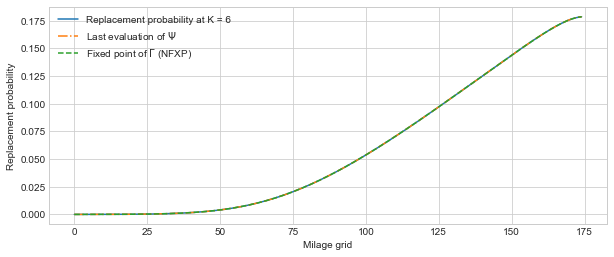

In [17]:
# solve the model with NFXP
ev0 = np.zeros(1)
solver_NFXP = solve_NFXP()
_, pk_NFXP = solver_NFXP.poly(model.bellman, beta=model.beta, output=2)


# Define figure
fig = plt.figure(figsize=(10,4)) 
ax = fig.add_subplot(1,1,1)



ax.plot(model.grid,1-pk_NPL[6,:],label=f'Replacement probability at K = 6')
ax.plot(model.grid,1-pk_NPL[99,:],label=f'Last evaluation of $\Psi$',linestyle='-.')
ax.plot(model.grid,1-pk_NFXP,label=f'Fixed point of $\Gamma$ (NFXP)',linestyle='--')

ax.set_xlabel('Milage grid')
ax.set_ylabel('Replacement probability')
plt.legend()

plt.show()

#### 6. $F^{U}(pk)$ is the unconditional transition probabilities induced by pk (vector) - what does that mean? 
(a) Try changing the number of gridpoints to 5, place a debugger in the zucher.phi.py-function and compare Fu and P1. What is the difference between the two? 

In [22]:
do_settings = {
    'n': 5,
    'p':[0.65]   
}
model = zurcher(**do_settings)

# SOLVE THE MODEL
pk_NPL = NPL.solve(model)

#### 7. What determines if NFXP is computationally cheaper to use than NPL? Think about what is in the inner loop of either algorithm. 

#### 8. Now we have to Estimate the model using NPL. In order to estimate the model you should understand 
<il type ="a">
<li> NPL.estimate </li>
<li> NPL.ll (skip the part of computing the gradient and the Hessian)</li>
</il>

#### 9. Fill in the missing stuff in NPL.ll, and run the code below to check that your results are correct

In [23]:
 # ESTIMATE
# setup
Kmax=10  # Max number of outer loop iterations for NPL 
pnames = ['RC','c']
model = zurcher()

# Load data
data = model.read_busdata(bustypes=[1,2,3,4])
data = NPL.setup_data(data)
samplesize = data.x.size


import time
t0 = time.time()
res, theta_hat,pk = NPL.estimate(model, data, Kmax)
t1 = time.time()

# Print the results
print(f'Structual estimation using busdata from Rust(1987)')
print(f'Beta        = {model.beta:.4f}')
print(f'n           = {model.n}')
print(f'Sample size = {samplesize}\n \n')

print(f'Parameters     Estimates    s.e. ') 
print(f'{pnames[0]}             {theta_hat[0]:.4f}     ')
print(f'{pnames[1]}              {theta_hat[1]:.4f}      \n ')


print(f'Log-likelihood {-res.fun*samplesize:.4f}') 
print(f'runtime (seconds) {(t1-t0):.4f}')

Structual estimation using busdata from Rust(1987)
Beta        = 0.9999
n           = 175
Sample size = 8156
 

Parameters     Estimates    s.e. 
RC             9.8818     
c              1.3441      
 
Log-likelihood -300.5682
runtime (seconds) 1.0270
